In [34]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import IFrame
from IPython.core.display import display
import os
import time
import seaborn as sns

### Read the prepared data #####

In [4]:
#### Function definition to read the dataset

def read_crime_data():
    
    file = os.path.join('nonull_date_binary_arr_domestic_corr_removecol.csv')
    crime_df = pd.read_csv(file)
    return crime_df

In [5]:
df=read_crime_data()

In [6]:
df.head(3)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Longitude,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,OnlyDate,Time
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,-87.657826,22257.0,65.0,21.0,32.0,23.0,17.0,216.0,2019-10-12,11:58:00 PM
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,-87.723882,21572.0,27.0,736.0,23.0,30.0,16.0,82.0,2019-10-12,11:57:00 PM
2,11859098,10/12/2019 11:55:00 PM,0454,BATTERY,STREET,0,0,24.0,29.0,08B,...,-87.712695,21569.0,30.0,800.0,14.0,57.0,21.0,153.0,2019-10-12,11:55:00 PM


In [11]:
#df['time_hour'] = pd.to_datetime(df['Time']).dt.hour

df['time_hour'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M:%S')

In [13]:
df['hourofday'] = pd.to_datetime(df['time_hour']).dt.hour

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,65.0,21.0,32.0,23.0,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,27.0,736.0,23.0,30.0,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23
2,11859098,10/12/2019 11:55:00 PM,0454,BATTERY,STREET,0,0,24.0,29.0,08B,...,30.0,800.0,14.0,57.0,21.0,153.0,2019-10-12,11:55:00 PM,23:55:00,23


In [15]:
### Write the file with cleaned data.
export_csv = df.to_csv (r'removed_columns_dropna_binaryarrest_corr_hour.csv', index = None, header=True)

### Machine learning part. Read the data into K-fold and train the model

In [5]:
def read_crime_data():
    
    file = os.path.join('removed_columns_dropna_binaryarrest_corr_hour.csv')
    crime_df = pd.read_csv(file)
    return crime_df

In [6]:
df_cleaned=read_crime_data()

In [7]:
### Check distribution
num_obs = len(df_cleaned)
num_true = len(df_cleaned.loc[df_cleaned['Arrest'] == 1])
num_false = len(df_cleaned.loc[df_cleaned['Arrest'] == 0])
print("Number of Arrest cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of No Arrest cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of Arrest cases:  1719183 (27.35%)
Number of No Arrest cases: 4567784 (72.65%)


In [9]:
import numpy as np
hours_in_day=23
df_cleaned['sin_time']=np.sin(2*np.pi*df_cleaned.hourofday/hours_in_day)
df_cleaned['cos_time']=np.cos(2*np.pi*df_cleaned.hourofday/hours_in_day)

df_cleaned.head(2)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,32.0,23.0,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23,-2.449294e-16,1.0
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,23.0,30.0,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23,-2.449294e-16,1.0


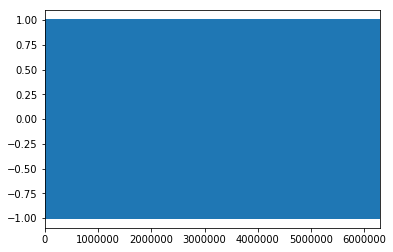

In [21]:
df_cleaned.sin_time.plot()

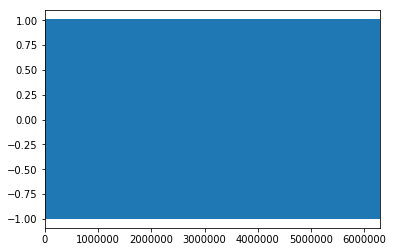

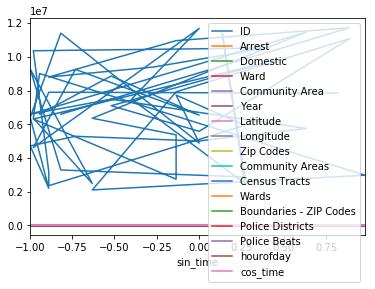

In [24]:
df_cleaned.cos_time.plot()
df_cleaned.sample(50).plot.line('sin_time')

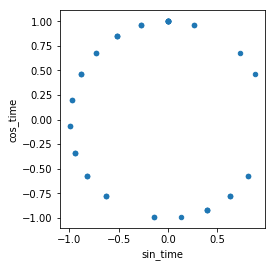

In [10]:
df_cleaned.sample(50).plot.scatter('sin_time','cos_time').set_aspect('equal')

### Machine learning with random forest, naive bayes, Logistic regression

In [11]:

df_cleaned['Ward'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [12]:
df_cleaned.head(2)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,32.0,23.0,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23,-2.449294e-16,1.0
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,23.0,30.0,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23,-2.449294e-16,1.0


In [25]:
df_cleaned.Ward.unique()

array([ 6., 28., 24., 32.,  8., 15., 27., 14., 16., 42.,  1., 34., 13.,
       35., 49.,  2., 10., 44., 36.,  5., 17., 37.,  9.,  3., 18., 33.,
       25.,  4., 46., 22., 48., 21., 20., 23., 47.,  7., 43., 29., 45.,
       38., 26., 19., 50., 12., 11., 41., 31., 40., 30., 39.])

In [30]:
df_cleaned['IUCR'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [ ]:
### Write the file with cleaned data.
export_csv = df_cleaned.to_csv (r'removed_columns_dropna_binaryarrest_corr_hour_sin_coscsv', index = None, header=True)

In [24]:
df_cleaned.head(2)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time
0,11859143,10/12/2019 11:58:00 PM,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6.0,67.0,14,...,32.0,23.0,17.0,216.0,2019-10-12,11:58:00 PM,23:58:00,23,-2.449294e-16,1.0
1,11859039,10/12/2019 11:57:00 PM,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28.0,26.0,18,...,23.0,30.0,16.0,82.0,2019-10-12,11:57:00 PM,23:57:00,23,-2.449294e-16,1.0


### Define the features picked and how you got there


In [31]:
### Splitting data for training and testing

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['IUCR','sin_time' ,'cos_time', 'Ward']
predicted_class_names = ['Arrest']

X = df_cleaned[feature_col_names].values     # predictor feature columns (8 X m)
y = df_cleaned[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [35]:
##We check to ensure we have the the desired 70% train, 30% test split of the data
print("{0:0.2f}% in training set".format((len(X_train)/len(df_cleaned.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_cleaned.index)) * 100))

70.00% in training set
30.00% in test set


In [29]:
# print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Arrest'] == 1]), (len(df.loc[df['Arrest'] == 1])/len(df.index)) * 100.0))
# print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Arrest'] == 0]), (len(df.loc[df['Arrest'] == 0])/len(df.index)) * 100.0))
# print("")
# # print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
# print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
# print("")
# print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
# print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [39]:
rf_predict_train = rf_model.predict(X_train)
from sklearn import metrics
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.8888


In [40]:
rf_predict_test = rf_model.predict(X_test)


# testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.8803


In [41]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[1319766   49913]
 [ 175781  340631]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92   1369679
           1       0.87      0.66      0.75    516412

   micro avg       0.88      0.88      0.88   1886091
   macro avg       0.88      0.81      0.84   1886091
weighted avg       0.88      0.88      0.87   1886091



## Naive Bayes

In [42]:
#### Fitting a model
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.6883



In [44]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("nb_predict_test", nb_predict_test)
print ("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test [0 0 1 ... 0 0 0]
y_test [[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]
Accuracy: 0.6877


In [45]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[1273932   95747]
 [ 493276   23136]]

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.93      0.81   1369679
           1       0.19      0.04      0.07    516412

   micro avg       0.69      0.69      0.69   1886091
   macro avg       0.46      0.49      0.44   1886091
weighted avg       0.58      0.69      0.61   1886091



In [47]:
from sklearn.externals import joblib

joblib.dump(nb_model, "./chicago-crime-trained-model-ward-IUCR-time-NB.pkl")

['./chicago-crime-trained-model-ward-IUCR-time-NB.pkl']

In [48]:
from sklearn.externals import joblib

joblib.dump(rf_model, "./chicago-crime-trained-model-ward-IUCR-time-RF.pkl")

['./chicago-crime-trained-model-ward-IUCR-time-RF.pkl']